In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)

In [4]:
sample

array([2, 5, 1, 3, 1, 1, 3, 3, 5, 6, 4, 3, 2, 2, 4, 1, 6, 1, 5, 4, 6, 4, 4,
       5, 3, 1, 5, 3, 5, 2, 6, 4, 6, 2, 2, 4, 3, 4, 4, 5, 6, 2, 4, 3, 1, 3,
       6, 6, 5, 1, 3, 5, 4, 1, 3, 4, 6, 2, 5, 3, 5, 5, 6, 5, 6, 2, 6, 5, 5,
       6, 5, 4, 3, 1, 5, 3, 4, 4, 6, 5, 2, 4, 5, 1, 1, 6, 3, 6, 4, 4, 3, 3,
       1, 5, 4, 6, 4, 3, 5, 2])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [5]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({5: 21, 4: 20, 3: 18, 6: 17, 1: 13, 2: 11})
Вероятности выпадений каждой из сторон:
{1: 0.13, 2: 0.11, 3: 0.18, 4: 0.2, 5: 0.21, 6: 0.17}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [8]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

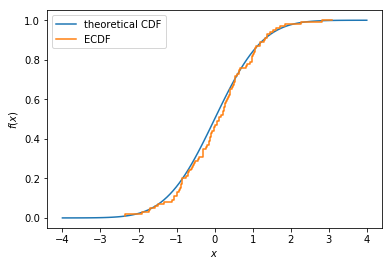

In [9]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

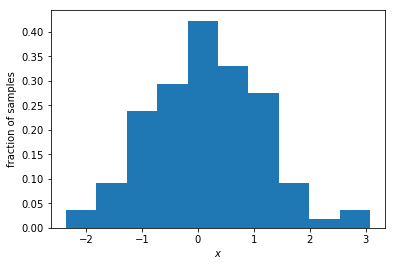

In [10]:
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

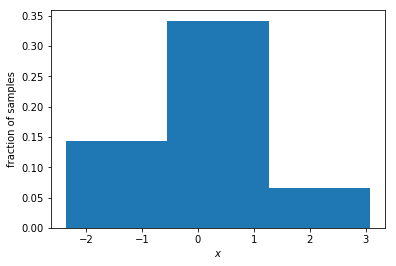

In [11]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

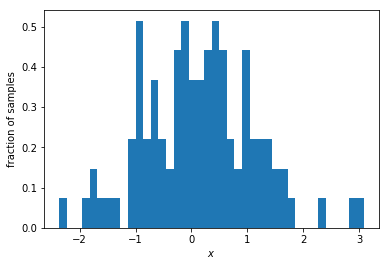

In [12]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

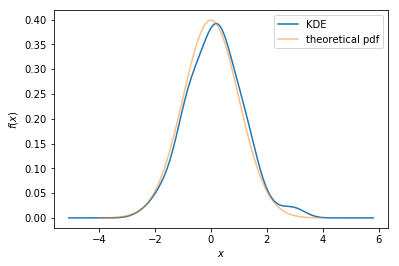

In [13]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

правило двух трех дисперсий .В интервал от μ − 2σ до μ + 2σ попадает примерно 95% вероятностной массы нор-
мально распределенной случайной величины (см. рис. 11). Это часто используемое
на практике правило двух сигм. Другой его вариант — правило трех сигм (см. рис.
12): в интервале от μ − 3σ до μ + 3σ случайная величина реализуется практически
со стопроцентной вероятностью (99,7%)



т.е. сигма это sqrt(10000) = 100
мю это среднее 1000

1000-2*100
800
1000+2*100
1200


In [35]:
import math
print math.exp(-3)

0.0497870683679


Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы не получаете ни одного спам-письма? Округлите до двух знаков после десятичной точки.

0.05
Правильный ответ 
Пусть X — число приходящих вам за день спам-писем. X — счётчик, значит, не имея других данных, естественно попытаться описать эту величину распределением Пуассона.

𝔼X=λ=3⇒
P(X=0)=30e−30!=e−3≈0.05.

Метеостанция, находящаяся в ботаническом саду Сиднея, регистрирует количество выпадающих осадков с 1885 года. Среднее годовое количество осадков за период с 1885 по 2015 включительно составляет 1197.69 мм, выборочная дисперсия — 116182.2.

Считая, что годовое количество осадков — случайная величина, не меняющаяся во времени и имеющая нормальное распределение, постройте интервал, который с вероятностью 99.7% будет содержать количество осадков, которые выпадут в 2016 году. Чему равна его верхняя граница? Округлите ответ до двух знаков после десятичной точки.

In [44]:
Dv = 116182.2
X = 1197.69
syear = 1885
eyear = 2015
n=eyear-syear

найдем среднеквадратическое отклонение сигма 

In [39]:

sigma = math.sqrt(S)
sigma

340.8551011793721

по правилу трех сигм правило трех сигм в интервале от μ − 3σ до μ + 3σ случайная величина реализуется практически
со стопроцентной вероятностью (99,7%).

In [41]:
sigma3 = sigma*3
low = X - sigma3
up = X + sigma3
print low, up

175.124696462 2220.25530354


2. 
Оцените значение параметра σ¯n — среднеквадратического отклонения нормального распределения, которым, согласно центральной предельной теореме, можно аппроксимировать распределение среднего количества осадков за год из предыдущей задачи. Округлите ответ до двух знаков после десятичной точки.
￼
340.86
Неправильный ответ 
Вы оценили σ — среднеквадратическое отклонение исходной случайной величины X, а не σ¯n — среднеквадратическое отклонение её выборочного среднего Xn! Примените центральную предельную теорему.

3. 
Постройте приближённый 99.7% доверительный интервал для среднего количества осадков за год. Чему равен верхний доверительный предел? Округлите ответ до двух знаков после десятичной точки.

2220.26
Неправильный ответ 
Это верхняя граница интервала для количества осадков, а не для среднего количества осадков! Вам нужна другая сигма — среднеквадратичное отклонение не исходной случайной величины, а её выборочного среднего. Вы посчитали её в предыдущем вопросе.
